Checking Fig1 plots 

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
from analysis import bender_class
from config import path_to_repository
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [28]:
import seaborn
seaborn.set(font='Arial',context='talk',font_scale=1.0, style='white')

Fig 1E -- min angle for 100% accuracy 

In [30]:
# Specify the curve fit type, 1 for linear, 2 for quadratic.  
degree = 2

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.5_static_v2_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.7_static_v1_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.76_static_v2_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.73_static_v3_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_7_25/1.765_static_v1_velcro_5_7_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-

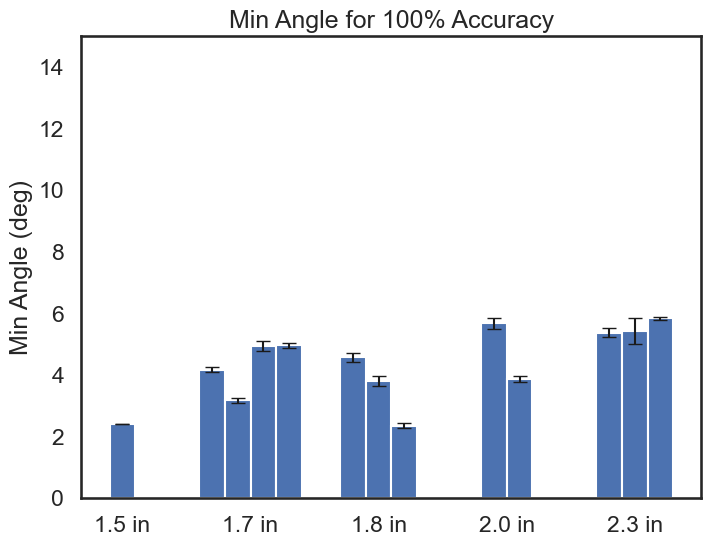

In [31]:
# 1.5 in samples
#DS25 = os.path.join(path_to_repository , "CSV Data/11_27_24/1_53_bubble/Bending_data_abs_1p53_11_27_24_0deg_reapply_2.csv")
DS25 = os.path.join(path_to_repository , "CSV Data/5_12_25/1.5_static_v2_velcro_5_12_25.csv")

# 1.7 in samples 
#DS7_datafiles = os.path.join(path_to_repository , "CSV Data/2_4_25/second test/Bending_data_abs_1p7_abs_1p7_2nd_reapply_2_4_25.csv")
DS7_datafiles = os.path.join(path_to_repository , "CSV Data/5_12_25/1.7_static_v1_velcro_5_12_25.csv")
#DS8_datafiles = os.path.join(path_to_repository , "CSV Data/4_11_25/1.787_static_vs2_v1_4_11_25.csv")
DS8_datafiles = os.path.join(path_to_repository , "CSV Data/5_12_25/1.76_static_v2_velcro_5_12_25.csv")
#DS13_datafiles = os.path.join(path_to_repository , "CSV Data/3_18_25/Bending_data_abs_1p732_0deg_retest_v3_3_18_25.csv")
DS13_datafiles = os.path.join(path_to_repository , "CSV Data/5_12_25/1.73_static_v3_velcro_5_12_25.csv")
#DS14_datafiles = os.path.join(path_to_repository , "CSV Data/3_20_25/Bending_data_abs_1p758_retest_v8_3_20_25.csv")
DS14_datafiles = os.path.join(path_to_repository , "CSV Data/5_7_25/1.765_static_v1_velcro_5_7_25.csv")




# 1.8 in samples
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/5_7_25/1.8_static_v1_velcro_5_7_25.csv")
#DS3_datafiles = os.path.join(path_to_repository , "CSV Data/4_15_25/1.85_static_v2_4_15_25.csv")
#DS4_datafiles = os.path.join(path_to_repository , "CSV Data/4_11_25/1.86_static_vs3_v1_4_11_25.csv")
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/4_22_25/1.86_static_v1_4_22_25.csv")
#DS6_datafiles = os.path.join(path_to_repository , "CSV Data/12_9_24/fourth/Bending_data_abs_1p897_s4_12_9_24.csv")
DS6_datafiles = os.path.join(path_to_repository , "CSV Data/5_7_25/1.89_static_v2_velcro_5_7_25.csv")


# 1.987 in samples
DS16_datafiles = os.path.join(path_to_repository , "CSV Data/5_7_25/1.98_static_v2_velcro_5_7_25.csv")
#DS11_datafiles = os.path.join(path_to_repository , "CSV Data/4_15_25/1.98_static_v2_4_15_25.csv")
DS11_datafiles = os.path.join(path_to_repository , "CSV Data/5_7_25/1.987_static_v1_velcro_5_7_25.csv")
#DStest = os.path.join(path_to_repository , "CSV Data/6_2_25/2.1_static_v4_silpoxy_0.04_6_2_25.csv")



# 2.3 in samples

#DS1_datafiles = os.path.join(path_to_repository , "CSV Data/4_15_25/2.2_static_v3_4_15_25.csv")
#DS2_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_static_v1_4_17_25.csv")
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/4_17_25/2.24_reapplication_v3_4_17_25.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.27_reapplication_v2_4_18_25.csv")
DS15_datafiles = os.path.join(path_to_repository , "CSV Data/4_18_25/2.34_static_v1_4_18_25.csv")

# Added these files to PK_data_accuracy_check tab in data_25_01_14.xlsx file 
DS_all = [[DS25], 
          [DS7_datafiles, DS8_datafiles, DS13_datafiles, DS14_datafiles],
          [DS3_datafiles, DS4_datafiles, DS6_datafiles],
          [DS16_datafiles, DS11_datafiles],
          [DS1_datafiles, DS2_datafiles, DS15_datafiles] 
         ]

bar_labels = ["1.5 in", "1.7 in", "1.8 in", "2.0 in", "2.3 in"]
bar_colors = ["b"]*len(bar_labels)
ma_100_list = []

# For each dataset -- show training and testing on individual datasets
for i_g, group in enumerate(DS_all):
    
    ma_100_list_group = []; 
    for i_d, datafiles in enumerate(group):
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()
        g.train_model_test_accuracy(degree=degree)
        min_angle_100, all_min_angle_100 = g.get_min_accuracy_100()
        ma_100_list_group.append(all_min_angle_100)
    ma_100_list.append(ma_100_list_group)
        
g.plot_bar_chart(ma_100_list, bar_labels, title="Min Angle for 100% Accuracy", ylabel="Min Angle (deg)", colors=bar_colors,
                ylim=(0, 15))



Fig 1G -- boxplot 

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.5_static_v2_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.7_static_v1_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.76_static_v2_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.73_static_v3_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_7_25/1.765_static_v1_velcro_5_7_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-

C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:1437: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


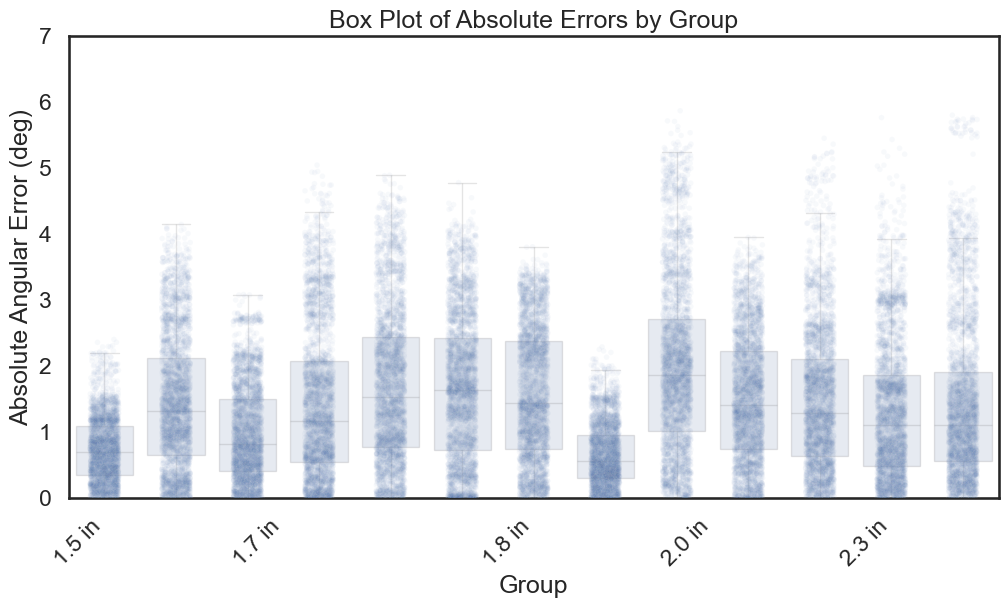

In [33]:
error_data_dict = {}  # Dictionary for box plot: {sample_name: error_values}
group_dict = {}  # Dictionary to map samples to groups

for i, group in enumerate(DS_all):  # Loop over groups
    for j, datafiles in enumerate(group):  # Loop over datasets in each group
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()
        #g.normalize_adc_over_R0()
        g.train_model_test_accuracy(degree=degree)
        
        # Use cross_validation_angular_error to get error data
        mean_error, std_error, predictions_df = g.cross_validation_angular_error(degree=degree)

        if not isinstance(predictions_df, pd.DataFrame):
            raise TypeError(f"Expected cross_validation_angular_error to return a DataFrame, got {type(predictions_df)}")

        # Ensure the DataFrame contains the 'Absolute Error' column
        if "Absolute Error" not in predictions_df.columns:
            raise ValueError(f"Dataset from {datafiles} does not contain 'Absolute Error' column")

        # Assign unique sample names and store error values
        sample_name = f"Group{i+1}_Sample{j+1}"  
        error_data_dict[sample_name] = predictions_df['Absolute Error'].tolist()
        group_dict[sample_name] = bar_labels[i]  # Assign to group

    
g.plot_box_plot(error_data_dict, group_dict, bar_colors, bar_labels,  box_alpha=0.15, data_alpha=0.04, jitter=0.2)



Pairwise plots 1F

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.5_static_v2_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.5_static_v2_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.7_static_v1_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.76_static_v2_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_12_25/1.73_static_v3_velcro_5_12_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-

C:\Users\toppe\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\toppe\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_7_25/1.8_static_v1_velcro_5_7_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/4_22_25/1.86_static_v1_4_22_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_7_25/1.89_static_v2_velcro_5_7_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_7_25/1.98_static_v2_velcro_5_7_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_7_25/1.987_static_v1_velcro_5_7_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV

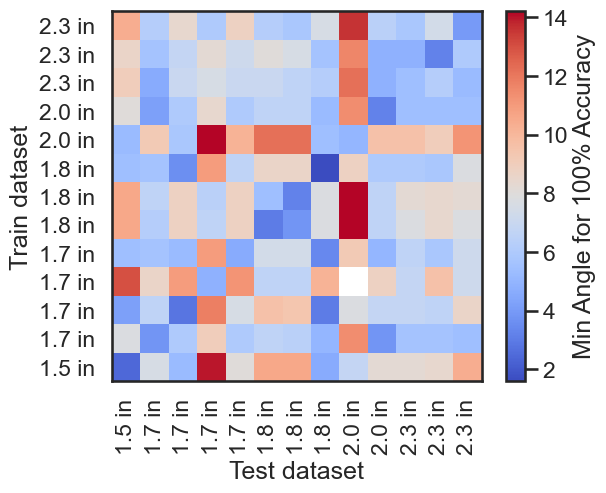

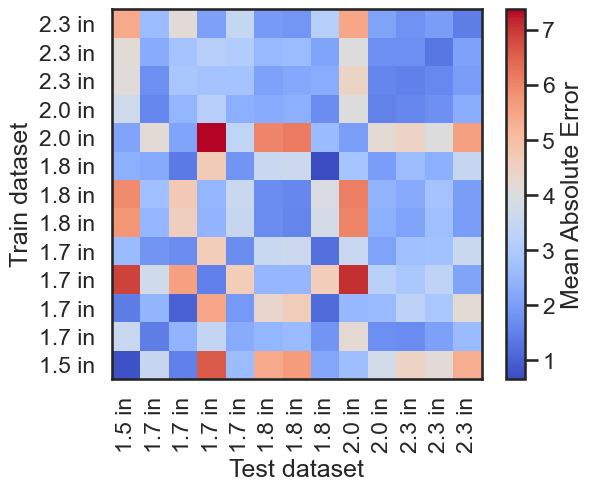

In [35]:
# Initialize results list
DS_flat = []; xlabel_flat = []
for _, (ds_group, ds_lab) in enumerate(zip(DS_all, bar_labels)):
    xlabel_flat.extend([ds_lab]*len(ds_group))
    DS_flat.extend(ds_group)

pairwise_min_accuracy = np.zeros((len(DS_flat), len(DS_flat))) + np.nan
pairwise_abs_error = np.zeros((len(DS_flat), len(DS_flat))) + np.nan

# Iterate over each dataset as the training dataset
for i, train_datafiles in enumerate(DS_flat):
    train_name = 'DS'+str(i+1)
    
    g = bender_class()
    g.load_data(train_datafiles)
    g.normalize_adc_bw_01()
    #g.normalize_adc_over_R0()

    # Train the model before testing (for off-diagonal cases)
    # This is a model fit on training data (make this as high as possible)
    # Just need 1 iteration to get the model
    g.train_model_test_accuracy(perc_train = 0.99, niter=1, degree=degree)


    for j, test_datafiles in enumerate(DS_flat):
        
        # Diagonal Case (Within-Sample Testing)
        if i == j:
            # Make a new bender class with new model (fit on 80%, test on 20% x 10 times)
            g2 = bender_class()
            g2.load_data(train_datafiles)
            g2.normalize_adc_bw_01()
            #g2.normalize_adc_over_R0()

            # Do typical train on 80%, test on 20% x 10 times 
            g2.train_model_test_accuracy(perc_train = 0.8, niter=10, degree=2)
            min_angle_100, all_min_angle_100 = g.get_min_accuracy_100()
            pairwise_min_accuracy[i, j] = np.mean(np.array(all_min_angle_100))
            pairwise_abs_error[i, j] = np.mean(np.hstack((g2.abs_angular_error)))
        # Off-Diagonal Case (Cross-Sample Testing)
        else:

            # Load test dataset separately
            g_test = bender_class()
            g_test.load_data(test_datafiles)  
            g_test.normalize_adc_bw_01()
            #g_test.normalize_adc_over_R0()
            df_test = g_test.data

            # Run multiple accuracy tests
            acc = []; error = []
            for _ in range(10): 
                accuracy, abs_error = g.predict_new_data(train_test_split(df_test, test_size=0.2, shuffle=True, random_state=42)[1])
                acc.append(accuracy)
                error.append(abs_error)

            # Compute Min Angle for Accuracy 100%
            min_angle_100, all_min_angle_100 = g.get_min_accuracy_100(accuracy_matrix=np.vstack(acc)) or (np.nan, None)
            pairwise_min_accuracy[i, j] = np.mean(np.array(all_min_angle_100))

            mean_error = np.mean(np.hstack((error)))
            pairwise_abs_error[i, j] = mean_error

for _, (data, title) in enumerate(zip([pairwise_min_accuracy, pairwise_abs_error], 
                                      ['Min Angle for 100% Accuracy', 'Mean Absolute Error'])):
    f, ax = plt.subplots()
    plt.pcolormesh(data, cmap='coolwarm', vmin=np.nanmin(data), vmax=np.nanmax(data))
    plt.xticks(np.arange(len(DS_flat))+0.5, xlabel_flat, rotation=90)
    plt.xlabel('Test dataset')
    plt.yticks(np.arange(len(DS_flat))+0.5, xlabel_flat)
    plt.ylabel('Train dataset')
    plt.axis('square')
    plt.colorbar(label=title)


Weird...looks like some samples are just bad "test" sample datasets, but are ok when testing on their own..? 

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/5_7_25/1.89_static_v2_velcro_5_7_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0


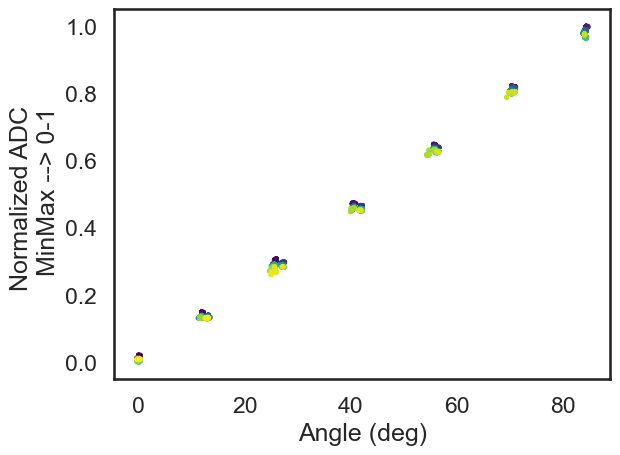

In [37]:
i = 8; j = 9 # dataset 1 is a bad test dataset
#g = bender_class()
#g.load_data(DS_flat[1])
#g.normalize_adc_bw_01()
#g.plot_data()
#g.train_model_test_accuracy(perc_train = 0.99, niter=1)

g = bender_class()
g.load_data(DS6_datafiles)
g.normalize_adc_bw_01()
g.plot_data(scatter=True)